# DATA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing research data
prep0 = pd.read_csv('reactor_data.csv')
prep0.head()

,Time,Running_cycle,FI-001,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,6/29/2004 4:00,1,57.376325,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,6/29/2004 4:00,2,57.415584,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,6/29/2004 4:00,3,57.454843,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,6/30/2004 0:00,4,57.543094,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,6/30/2004 0:00,5,57.470024,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151


In [3]:
#Identity variables name
prep0.columns

Index(['Time', 'Running_cycle', 'FI-001', 'FI-002', 'TC-001', 'TC-002',
       'DT-001', 'DT-002', 'DP-001', 'DP-002', 'DP-003', 'DP-004', 'PI-001',
       'PI-002', 'PI-003', 'PI-004', 'AI-001', 'AI-002', 'AI-003', 'AI-004',
       'AI-005', 'AI-006', 'AI-007', 'AI-008', 'AI-009', 'AI-010', 'RX-001',
       'TI-001', 'TI-002', 'TI-005', 'TI-006', 'TI-007', 'TI-008', 'TI-009',
       'TI-010', 'TI-011', 'TI-012', 'TI-013', 'TI-014', 'TI-015', 'TI-018',
       'TI-019', 'TI-020', 'TI-021', 'TI-022', 'TI-023', 'TI-024', 'TI-025',
       'TI-026', 'TI-027', 'TI-028', 'TI-029', 'TI-030', 'TI-031', 'TI-032',
       'TI-033', 'TI-034', 'TI-035', 'TI-036', 'TI-037', 'TI-038', 'TI-039',
       'TI-040', 'TI-041', 'TI-042', 'CONVERSION'],
      dtype='object')

# DATA PREPARATION, CLEANING, AND FEATURE EXTRACTION

In [4]:
#Removing unused 'FI-002', 'NO', 'Time' column
prep1 = prep0.iloc[:, :].drop(['FI-001','Running_cycle','Time'], axis=1)
prep1

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,833.271973,323.390320,286.120880,67.911438,33.537292,20.344055,0.065580,20.184771,40.909565,70.437078,...,312.373871,301.223907,304.223450,299.636078,304.582642,300.072601,290.822022,289.512878,291.541504,94.829638
18719,832.827393,323.574768,286.037537,67.504608,33.254303,20.169985,0.066432,20.349388,40.900963,70.312330,...,312.328278,301.028229,304.057129,299.530151,304.531738,300.036346,290.642395,289.317627,291.300690,94.831773
18720,833.848450,323.598389,286.136810,67.682678,33.338257,20.028092,0.126205,20.386351,40.855808,70.336130,...,312.472900,301.012054,304.044495,299.594665,304.567383,300.047790,290.718109,289.436035,291.387756,94.878506
18721,833.529907,323.480347,286.043396,67.667175,32.947021,20.317225,0.075650,20.188131,40.896164,70.413744,...,312.350281,301.124390,304.156006,299.460388,304.473602,299.988190,290.674011,289.329468,291.345581,94.495033


In [5]:
#Convert timestamp object data to numerical
prep2 = prep1.apply(pd.to_numeric)
print(prep2.dtypes, prep2.shape)

FI-002        float64
TC-001        float64
TC-002        float64
DT-001        float64
DT-002        float64
               ...   
TI-039        float64
TI-040        float64
TI-041        float64
TI-042        float64
CONVERSION    float64
Length: 63, dtype: object (18723, 63)


In [6]:
#Check if there's missing value
prep2.isnull().sum()

FI-002        0
TC-001        0
TC-002        0
DT-001        0
DT-002        0
             ..
TI-039        0
TI-040        0
TI-041        0
TI-042        0
CONVERSION    0
Length: 63, dtype: int64

<AxesSubplot:xlabel='FI-002'>

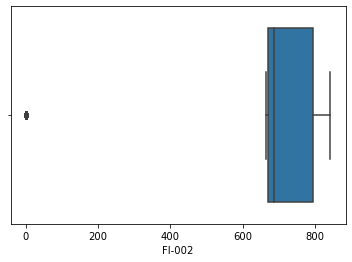

In [7]:
#Removing data where plant is not run, by identifying total raw material 'FI-001' loss flow rate
sns.boxplot(data=prep2,x=prep2['FI-002'])

In [8]:
#Remove shut down data by identifying outlier FI-001 with Inter Quantile Range Method

from numpy import percentile
# calculate interquartile range
q25_a, q75_a = percentile(prep2['FI-002'], 25), percentile(prep2['FI-002'], 75)
iqr_a = q75_a - q25_a
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_a, q75_a, iqr_a))
# calculate the outlier cutoff
cut_off_a = iqr_a * 1.5
lower_a, upper_a = q25_a - cut_off_a, q75_a + cut_off_a
print('Lower whisker=%.2f, Upper whisker=%.2f' % (lower_a, upper_a))
# identify outliers
shut_down_data = prep2[(prep2['FI-002']<lower_a)|(prep2['FI-002']>upper_a)]
print('Shut down data: %d' % len(shut_down_data))
# remove outliers
shut_down_removed = prep2[(prep2['FI-002']>lower_a)&(prep2['FI-002']<upper_a)]
print('Non-Shut down data: %d' % len(shut_down_removed))

Percentiles: 25th=670.419, 75th=794.510, IQR=124.090
Lower whisker=484.28, Upper whisker=980.65
Shut down data: 2510
Non-Shut down data: 16213


<AxesSubplot:xlabel='FI-002'>

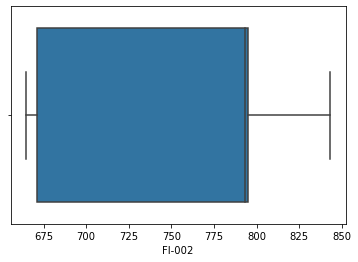

In [9]:
#Check again if there's still outlier in 'FI-001'
sns.boxplot(data=shut_down_removed, x=shut_down_removed['FI-002'])

In [10]:
prep3 = shut_down_removed
prep3.shape

(16213, 63)

In [11]:
#Remove outlier for all variables while keeps the whole row intact
lb = prep3.quantile(0.01)
ub = prep3.quantile(0.99)

prep4 = prep3[(prep3 > lb) & (prep3 < ub)]
prep4

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,833.271973,323.390320,286.120880,67.911438,33.537292,20.344055,0.065580,20.184771,40.909565,70.437078,...,312.373871,301.223907,304.223450,299.636078,304.582642,300.072601,290.822022,289.512878,291.541504,94.829638
18719,832.827393,323.574768,286.037537,67.504608,33.254303,20.169985,0.066432,20.349388,40.900963,70.312330,...,312.328278,301.028229,304.057129,299.530151,304.531738,300.036346,290.642395,289.317627,291.300690,94.831773
18720,833.848450,323.598389,286.136810,67.682678,33.338257,20.028092,0.126205,20.386351,40.855808,70.336130,...,312.472900,301.012054,304.044495,299.594665,304.567383,300.047790,290.718109,289.436035,291.387756,94.878506
18721,833.529907,323.480347,286.043396,67.667175,32.947021,20.317225,0.075650,20.188131,40.896164,70.413744,...,312.350281,301.124390,304.156006,299.460388,304.473602,299.988190,290.674011,289.329468,291.345581,94.495033


In [12]:
prep4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16213 entries, 0 to 18722
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FI-002      15887 non-null  float64
 1   TC-001      15886 non-null  float64
 2   TC-002      15887 non-null  float64
 3   DT-001      15886 non-null  float64
 4   DT-002      15888 non-null  float64
 5   DP-001      15886 non-null  float64
 6   DP-002      15816 non-null  float64
 7   DP-003      15885 non-null  float64
 8   DP-004      15886 non-null  float64
 9   PI-001      15886 non-null  float64
 10  PI-002      15886 non-null  float64
 11  PI-003      15887 non-null  float64
 12  PI-004      15887 non-null  float64
 13  AI-001      15887 non-null  float64
 14  AI-002      15887 non-null  float64
 15  AI-003      15887 non-null  float64
 16  AI-004      15887 non-null  float64
 17  AI-005      15851 non-null  float64
 18  AI-006      15887 non-null  float64
 19  AI-007      15887 non-nul

<AxesSubplot:>

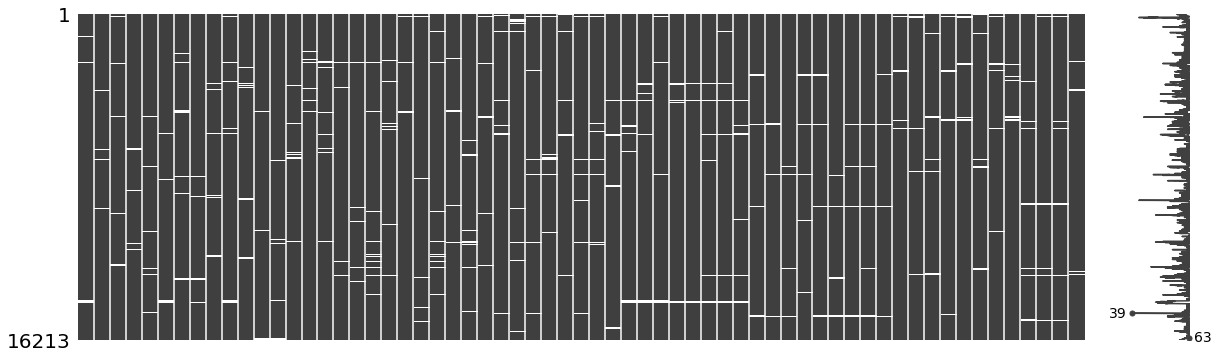

In [13]:
#Check deleted value position
import missingno as mno
mno.matrix(prep4, figsize = (20, 6))

In [14]:
#Fill missing value (from removed outlier) with imputer
prep5 = prep4.interpolate(method ='linear', limit_direction ='forward')
prep5.head()

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151


In [15]:
prep5.isnull().sum()

FI-002        0
TC-001        0
TC-002        0
DT-001        0
DT-002        0
             ..
TI-039        0
TI-040        0
TI-041        0
TI-042        0
CONVERSION    0
Length: 63, dtype: int64

In [16]:
prep5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FI-002,16213.0,746.679192,68.974394,668.778687,671.182739,793.192139,794.781494,836.910889
TC-001,16213.0,322.950928,5.226784,312.015381,319.500427,322.585754,326.562042,334.638306
TC-002,16213.0,278.760113,6.484141,266.984192,273.608520,278.874756,284.130310,292.542786
DT-001,16213.0,66.416289,6.934921,51.402039,62.645111,67.749573,71.104828,80.546149
DT-002,16213.0,37.237985,11.090657,22.402069,28.286957,34.591809,43.110779,69.457214
...,...,...,...,...,...,...,...,...
TI-039,16213.0,304.102563,7.659816,288.000122,298.397888,304.587952,309.892517,320.615326
TI-040,16213.0,305.790454,14.960208,278.586883,291.905914,307.346619,316.723419,336.157837
TI-041,16213.0,307.477383,14.811054,281.091980,294.418945,307.079346,319.622864,336.463501
TI-042,16213.0,304.674310,16.186075,277.008789,290.616974,303.848419,318.172211,335.618439


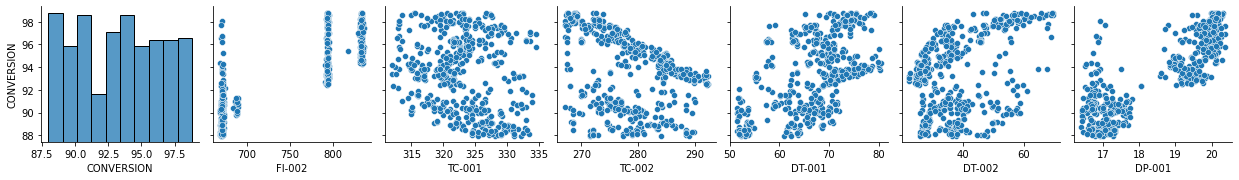

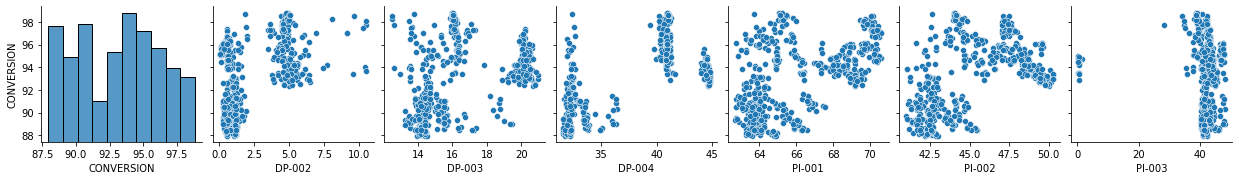

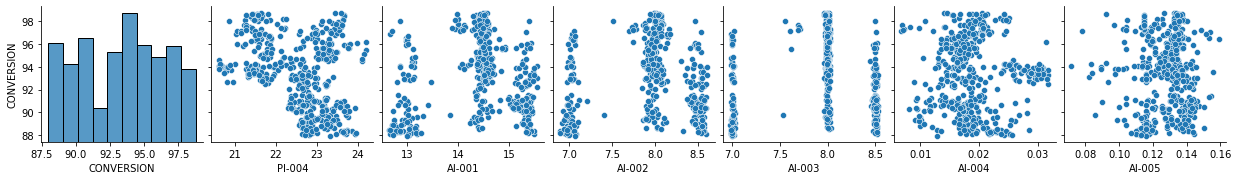

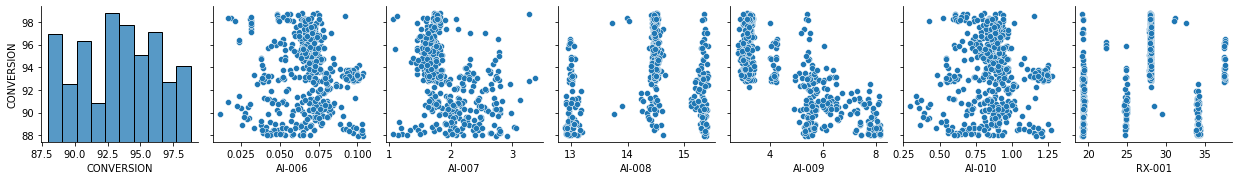

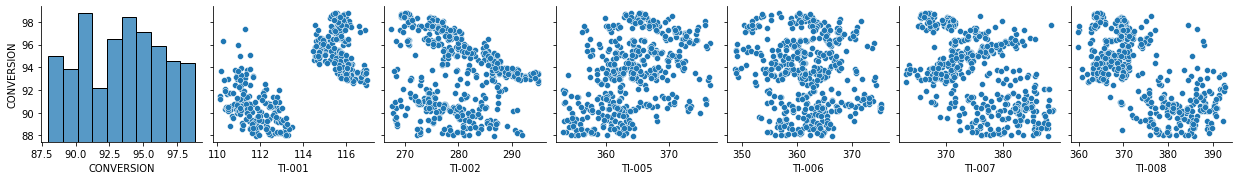

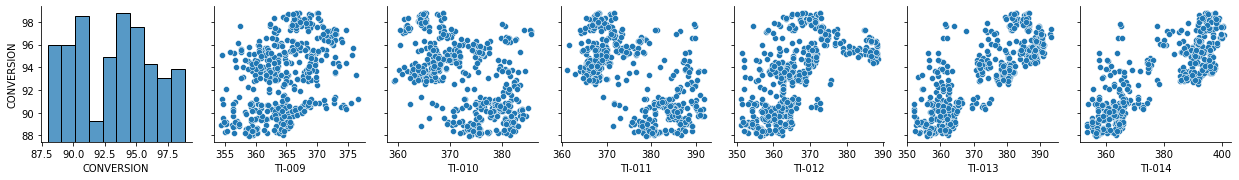

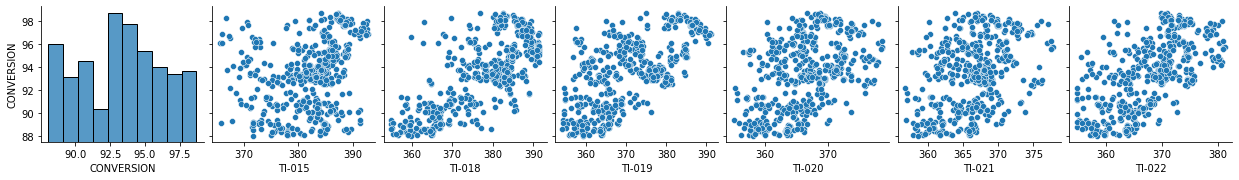

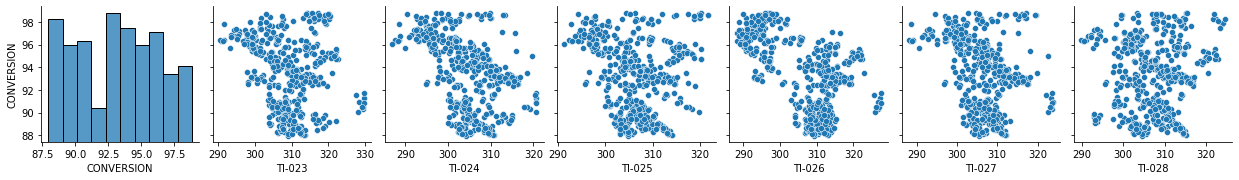

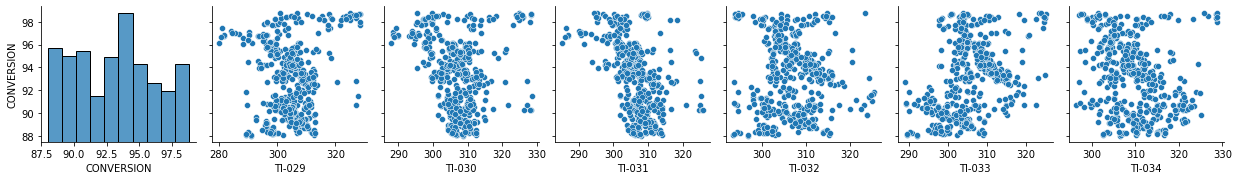

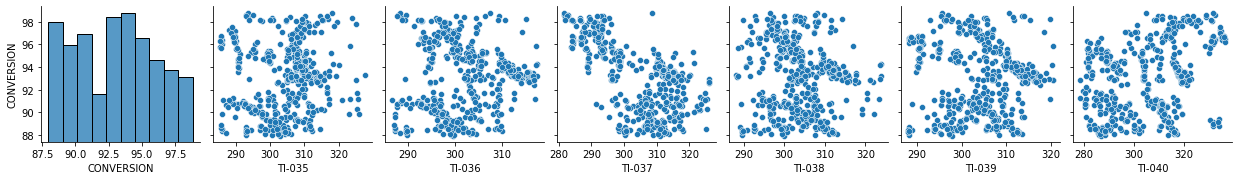

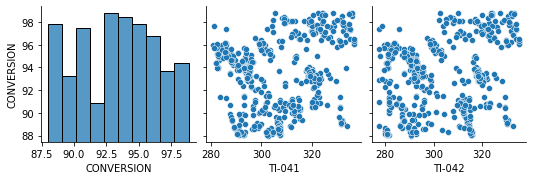

In [17]:
#Pairplot each predictor to target
sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','FI-002', 'TC-001', 'TC-002','DT-001', 'DT-002','DP-001'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','DP-002', 'DP-003', 'DP-004', 'PI-001','PI-002', 'PI-003'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'PI-004', 'AI-001', 'AI-002','AI-003', 'AI-004','AI-005'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'AI-006', 'AI-007','AI-008', 'AI-009', 'AI-010', 'RX-001'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'TI-001','TI-002','TI-005', 'TI-006', 'TI-007', 'TI-008'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-009','TI-010', 'TI-011', 'TI-012', 'TI-013','TI-014'],
    y_vars = ['CONVERSION'])
    
sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'TI-015', 'TI-018','TI-019', 'TI-020', 'TI-021', 'TI-022'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-023', 'TI-024', 'TI-025', 'TI-026', 'TI-027', 'TI-028'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'TI-029', 'TI-030', 'TI-031', 'TI-032','TI-033', 'TI-034'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-035', 'TI-036', 'TI-037', 'TI-038', 'TI-039','TI-040'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-041', 'TI-042'],
    y_vars = ['CONVERSION'])

In [18]:
#Correlation matrix after data imputation
corr2 = prep5.corr()
corr2.style.background_gradient(cmap='coolwarm')

In [19]:
#Data Scaling with normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled_data = pd.DataFrame(scaler.fit_transform(prep5), columns = prep5.columns)
print(scaled_data)

         FI-002    TC-001    TC-002    DT-001    DT-002    DP-001    DP-002  \
0      0.007176  0.330677  0.129659  0.574982  0.417758  0.137982  0.091838   
1      0.008307  0.331144  0.139802  0.574629  0.455150  0.130618  0.092498   
2      0.009438  0.331611  0.149945  0.574277  0.492541  0.123254  0.093158   
3      0.010967  0.333223  0.171362  0.582561  0.577324  0.107012  0.095012   
4      0.012189  0.331516  0.155732  0.560452  0.500110  0.123971  0.092848   
...         ...       ...       ...       ...       ...       ...       ...   
16208  0.978357  0.502806  0.748738  0.566475  0.236642  0.989480  0.006215   
16209  0.975713  0.510959  0.745477  0.552515  0.230628  0.945995  0.006296   
16210  0.981786  0.512003  0.749361  0.558625  0.232412  0.910548  0.011972   
16211  0.979891  0.506785  0.745706  0.558093  0.224098  0.982777  0.007171   
16212  0.979891  0.506785  0.745706  0.558093  0.224098  0.982777  0.007171   

         DP-003    DP-004    PI-001  ...    TI-034 

In [20]:
# Pearson correlation coefficient
select_corr = scaled_data.corr()["CONVERSION"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr = abs(select_corr)

# random threshold for features to keep
selected_features = abs_corr[abs_corr>0.4]
selected_features

DP-001    0.807746
FI-002    0.806157
TI-014    0.795037
TI-013    0.764606
TI-018    0.700174
DP-004    0.675512
TI-001    0.667385
TI-019    0.647600
TI-022    0.644449
DT-001    0.544135
TI-012    0.542178
DP-002    0.530594
PI-002    0.473997
TI-005    0.472168
TI-020    0.465437
PI-001    0.430794
TI-024    0.408135
AI-007    0.462468
TI-010    0.487901
TI-007    0.495802
TI-031    0.504460
TI-026    0.542696
TI-011    0.582506
TI-008    0.608041
TI-037    0.676970
AI-009    0.797870
Name: CONVERSION, dtype: float64

In [21]:
len(selected_features)

26

In [22]:
# Drop low correlation features
prep6 = scaled_data[selected_features.index].interpolate(method ='linear', limit_direction ='backward')
prep6.isnull().sum()

DP-001    0
FI-002    0
TI-014    0
TI-013    0
TI-018    0
DP-004    0
TI-001    0
TI-019    0
TI-022    0
DT-001    0
TI-012    0
DP-002    0
PI-002    0
TI-005    0
TI-020    0
PI-001    0
TI-024    0
AI-007    0
TI-010    0
TI-007    0
TI-031    0
TI-026    0
TI-011    0
TI-008    0
TI-037    0
AI-009    0
dtype: int64

In [23]:
y_lasso = scaled_data["CONVERSION"]
X_lasso = prep6

In [24]:
#Eliminate multicollinearity by removing irrelavant features with ebbedded method
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_lasso, y_lasso)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_lasso,y_lasso))
coef = pd.Series(reg.coef_, index = X_lasso.columns)

Best alpha using built-in LassoCV: 0.000093
Best score using built-in LassoCV: 0.933171


In [25]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 23 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

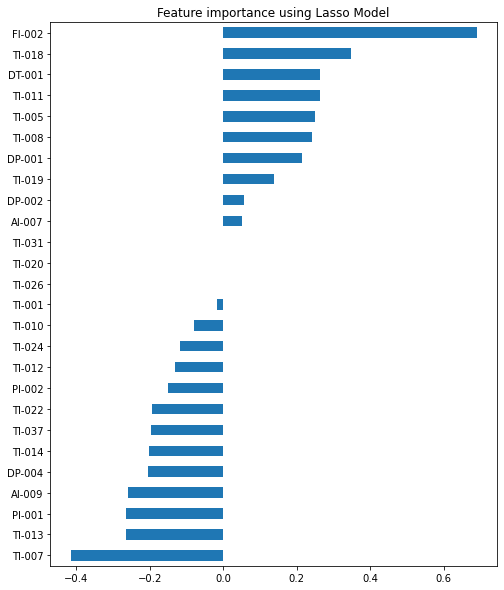

In [26]:
#Visualize important feature
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [27]:
#Select relevant reatures
abs_coef = abs(coef)
relevant_features = abs_coef[abs_coef>0]
prep7 = prep6[relevant_features.index].sort_index(axis=1, ascending=True)
prep7['CONVERSION'] = scaled_data["CONVERSION"]
prep7.shape

(16213, 24)

In [28]:
#Showing correlation between relevant features
corr3 = prep7.corr().style.background_gradient(cmap='coolwarm')
corr3

,AI-007,AI-009,DP-001,DP-002,DP-004,DT-001,FI-002,PI-001,PI-002,TI-001,TI-005,TI-007,TI-008,TI-010,TI-011,TI-012,TI-013,TI-014,TI-018,TI-019,TI-022,TI-024,TI-037,CONVERSION
AI-007,1.000000,0.508171,-0.605068,-0.365598,-0.598543,-0.329122,-0.633123,-0.380027,-0.473995,-0.630089,-0.390715,0.496358,0.633507,0.485211,0.611309,-0.421666,-0.604346,-0.610053,-0.352382,-0.425173,-0.502453,0.286689,0.343341,-0.462468
AI-009,0.508171,1.000000,-0.899661,-0.620813,-0.894308,-0.743551,-0.895437,-0.711594,-0.792831,-0.752550,-0.576772,0.441013,0.658815,0.488060,0.633110,-0.616926,-0.874695,-0.924246,-0.692661,-0.730534,-0.771141,0.188240,0.437556,-0.797870
DP-001,-0.605068,-0.899661,1.000000,0.620755,0.889258,0.539755,0.965602,0.706694,0.738625,0.881947,0.492134,-0.567006,-0.808451,-0.608148,-0.773423,0.621358,0.891708,0.913155,0.601093,0.716365,0.745159,-0.354156,-0.621459,0.807746
DP-002,-0.365598,-0.620813,0.620755,1.000000,0.722134,0.456555,0.640760,0.588011,0.645439,0.725394,0.308169,-0.622378,-0.619462,-0.727030,-0.678629,0.003394,0.527995,0.707311,0.388921,0.694828,0.599367,-0.100517,-0.166654,0.530594
DP-004,-0.598543,-0.894308,0.889258,0.722134,1.000000,0.607239,0.909023,0.723330,0.883843,0.913648,0.429869,-0.648597,-0.812200,-0.677713,-0.811741,0.460695,0.808411,0.907286,0.585408,0.640425,0.660184,-0.140233,-0.374423,0.675512
DT-001,-0.329122,-0.743551,0.539755,0.456555,0.607239,1.000000,0.530917,0.536242,0.590392,0.355050,0.414796,-0.220331,-0.330181,-0.271744,-0.304564,0.334746,0.570736,0.655155,0.457136,0.534459,0.512240,0.131472,-0.095858,0.544135
FI-002,-0.633123,-0.895437,0.965602,0.640760,0.909023,0.530917,1.000000,0.757240,0.810297,0.901855,0.474443,-0.613811,-0.828346,-0.644734,-0.809575,0.611593,0.894242,0.928547,0.648715,0.696366,0.735951,-0.336182,-0.585382,0.806157
PI-001,-0.380027,-0.711594,0.706694,0.588011,0.723330,0.536242,0.757240,1.000000,0.900401,0.608901,0.371899,-0.400631,-0.563919,-0.509155,-0.587717,0.382584,0.675045,0.723003,0.503509,0.677317,0.632747,-0.043757,-0.161847,0.430794
PI-002,-0.473995,-0.792831,0.738625,0.645439,0.883843,0.590392,0.810297,0.900401,1.000000,0.741510,0.375364,-0.515149,-0.664529,-0.577960,-0.686526,0.399252,0.704911,0.794443,0.552277,0.600037,0.604474,0.015895,-0.156943,0.473997
TI-001,-0.630089,-0.752550,0.881947,0.725394,0.913648,0.355050,0.901855,0.608901,0.741510,1.000000,0.329103,-0.746413,-0.887895,-0.769282,-0.890285,0.376772,0.746975,0.837916,0.458846,0.591936,0.610212,-0.310427,-0.511568,0.667385


In [29]:
#Drop high correlation variables among predictor
prep8 = prep7.drop(['FI-002', 'TI-001','TI-007', 'TI-010', 'TI-011', 'TI-014', 'PI-001'], axis = 1)

In [30]:
#Showing correlation between relevant features
corr4 = prep8.corr().style.background_gradient(cmap='coolwarm')
corr4

,AI-007,AI-009,DP-001,DP-002,DP-004,DT-001,PI-002,TI-005,TI-008,TI-012,TI-013,TI-018,TI-019,TI-022,TI-024,TI-037,CONVERSION
AI-007,1.000000,0.508171,-0.605068,-0.365598,-0.598543,-0.329122,-0.473995,-0.390715,0.633507,-0.421666,-0.604346,-0.352382,-0.425173,-0.502453,0.286689,0.343341,-0.462468
AI-009,0.508171,1.000000,-0.899661,-0.620813,-0.894308,-0.743551,-0.792831,-0.576772,0.658815,-0.616926,-0.874695,-0.692661,-0.730534,-0.771141,0.188240,0.437556,-0.797870
DP-001,-0.605068,-0.899661,1.000000,0.620755,0.889258,0.539755,0.738625,0.492134,-0.808451,0.621358,0.891708,0.601093,0.716365,0.745159,-0.354156,-0.621459,0.807746
DP-002,-0.365598,-0.620813,0.620755,1.000000,0.722134,0.456555,0.645439,0.308169,-0.619462,0.003394,0.527995,0.388921,0.694828,0.599367,-0.100517,-0.166654,0.530594
DP-004,-0.598543,-0.894308,0.889258,0.722134,1.000000,0.607239,0.883843,0.429869,-0.812200,0.460695,0.808411,0.585408,0.640425,0.660184,-0.140233,-0.374423,0.675512
DT-001,-0.329122,-0.743551,0.539755,0.456555,0.607239,1.000000,0.590392,0.414796,-0.330181,0.334746,0.570736,0.457136,0.534459,0.512240,0.131472,-0.095858,0.544135
PI-002,-0.473995,-0.792831,0.738625,0.645439,0.883843,0.590392,1.000000,0.375364,-0.664529,0.399252,0.704911,0.552277,0.600037,0.604474,0.015895,-0.156943,0.473997
TI-005,-0.390715,-0.576772,0.492134,0.308169,0.429869,0.414796,0.375364,1.000000,-0.223338,0.663101,0.721532,0.567874,0.692503,0.869386,-0.326888,-0.236536,0.471386
TI-008,0.633507,0.658815,-0.808451,-0.619462,-0.812200,-0.330181,-0.664529,-0.223338,1.000000,-0.324047,-0.680916,-0.363761,-0.555022,-0.518661,0.317664,0.509761,-0.608041
TI-012,-0.421666,-0.616926,0.621358,0.003394,0.460695,0.334746,0.399252,0.663101,-0.324047,1.000000,0.807006,0.691695,0.480650,0.593642,-0.248633,-0.468822,0.542178


In [31]:
# Pearson correlation coefficient
corr_final_feat = prep8.corr()["CONVERSION"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr_final = abs(corr_final_feat)

print(abs_corr_final)

DP-001    0.807746
TI-013    0.764606
TI-018    0.700174
DP-004    0.675512
TI-019    0.647600
TI-022    0.644449
DT-001    0.544135
TI-012    0.542178
DP-002    0.530594
PI-002    0.473997
TI-005    0.471386
TI-024    0.408135
AI-007    0.462468
TI-008    0.608041
TI-037    0.676970
AI-009    0.797870
Name: CONVERSION, dtype: float64


In [32]:
prep8.describe()

,AI-007,AI-009,DP-001,DP-002,DP-004,DT-001,PI-002,TI-005,TI-008,TI-012,TI-013,TI-018,TI-019,TI-022,TI-024,TI-037,CONVERSION
count,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000
mean,0.344613,0.346348,0.530719,0.244814,0.464081,0.515173,0.440587,0.472970,0.448470,0.406076,0.503894,0.607074,0.444170,0.495458,0.521960,0.482083,0.491219
std,0.161072,0.311541,0.344385,0.215015,0.365870,0.237953,0.284654,0.220095,0.268006,0.240323,0.292610,0.270313,0.253621,0.233386,0.191360,0.242921,0.281156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240180,0.074240,0.159918,0.058720,0.055099,0.385775,0.176755,0.334918,0.201664,0.241212,0.227581,0.377764,0.250587,0.324455,0.409749,0.262745,0.235998
50%,0.290550,0.244595,0.692077,0.117396,0.676352,0.560921,0.385582,0.459779,0.359732,0.354211,0.550594,0.692458,0.409205,0.509707,0.533446,0.510281,0.510707
75%,0.415732,0.544039,0.853240,0.452093,0.713119,0.676047,0.700792,0.616159,0.681762,0.533615,0.760995,0.810577,0.640118,0.651880,0.655715,0.680016,0.717906
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
prep8.columns

Index(['AI-007', 'AI-009', 'DP-001', 'DP-002', 'DP-004', 'DT-001', 'PI-002',
       'TI-005', 'TI-008', 'TI-012', 'TI-013', 'TI-018', 'TI-019', 'TI-022',
       'TI-024', 'TI-037', 'CONVERSION'],
      dtype='object')

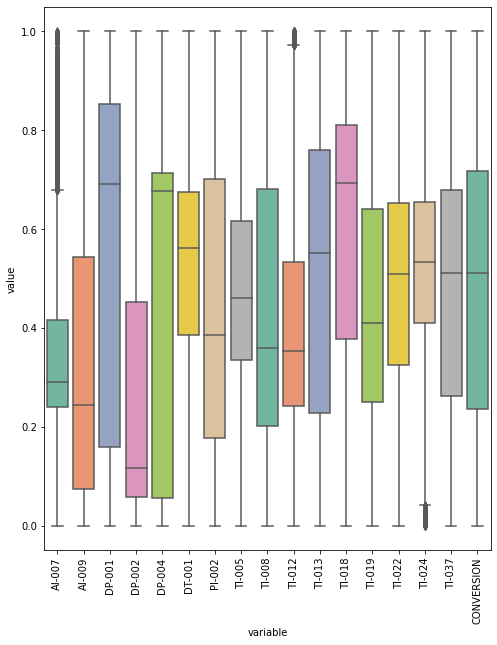

In [34]:
all_boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(pd.DataFrame(data=scaled_data, 
        columns=['AI-007', 'AI-009', 'DP-001', 'DP-002', 'DP-004', 'DT-001',
       'PI-002', 'TI-005', 'TI-008', 'TI-012', 'TI-013', 'TI-018', 'TI-019',
       'TI-022', 'TI-024', 'TI-037', 'CONVERSION'])), linewidth=1.5, palette="Set2")
plt.setp(all_boxplot.get_xticklabels(), rotation=90)
plt.show()

In [35]:
len(prep8.columns)

17

In [36]:
#Select data for predictors and target

#Import the features
X_df = prep8.drop('CONVERSION', axis = 1)
X = prep8.drop('CONVERSION', axis = 1).values.astype(float).reshape(-1, len(prep8.columns)-1)

# Extract the target
y_df = prep8['CONVERSION']
y = prep8['CONVERSION'].values.astype(float)

print(X.shape, y.shape)

(16213, 16) (16213,)


In [37]:
#Create function to return conversion scale for later use
def return_conversion_scale(variable_plot):
    minimum = min(prep5['CONVERSION'])
    maximum = max(prep5['CONVERSION'])
    return ((variable_plot - min(variable_plot)) /(max(variable_plot) - min(variable_plot)))*(maximum-minimum)+minimum

Observations: 16213
Training Observations: 13781
Testing Observations: 2432


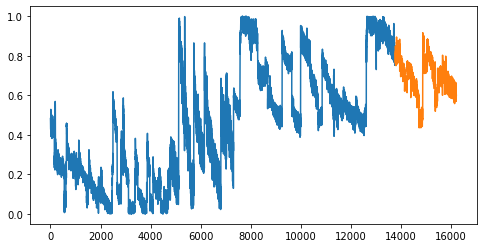

In [38]:
#Divide data into training 70%, validation 15% and testing 15%
#In this first step, we will divide data which will be used to train the model and as prediction
#1st splitting : training (85%); testing (15%)
y_tr_size = int(len(y) * 0.85)
y_tr, y_test = y[0:y_tr_size], y[y_tr_size:len(y)]
X_tr_size = int(len(X) * 0.85)
X_tr, X_test = X[0:X_tr_size], X[X_tr_size:len(X)]
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(y_tr)))
print('Testing Observations: %d' % (len(y_test)))
plt.subplots(figsize=(8,4))
plt.plot(y_tr)
plt.plot([None for i in y_tr] + [X for X in y_test])
plt.show()

In [39]:
print('Training Features Shape:', X_tr.shape)
print('Training Targets Shape:', X_test.shape)
print('Testing Features Shape:', y_tr.shape)
print('Testing Targets Shape:', y_test.shape)

Training Features Shape: (13781, 16)
Training Targets Shape: (2432, 16)
Testing Features Shape: (13781,)
Testing Targets Shape: (2432,)


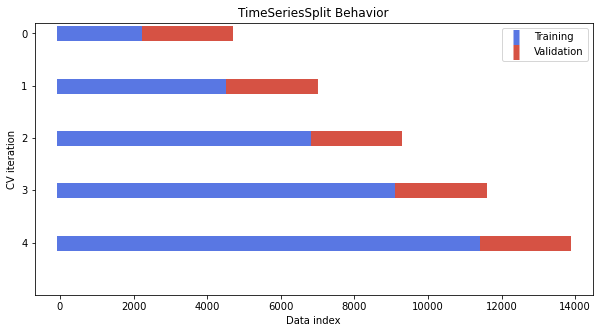

In [40]:
#Import and initialize the cross-validation iterator
#In the second step, we split training data from 1st step into training (80%); validation (20%)
from sklearn.model_selection import TimeSeriesSplit

n_splits = 5
ts_split = TimeSeriesSplit(n_splits)

fig, ax = plt.subplots(figsize=(10,5))
for ii, (tr, tt) in enumerate(ts_split.split(X_tr, y_tr)):
    
    #Plot training and testing indices
    l1 = ax.scatter(tr, [ii] * len(tr), c=[plt.cm.coolwarm(.1)],
                    marker='_', lw=15)
    l2 = ax.scatter(tt, [ii] * len(tt), c=[plt.cm.coolwarm(.9)],
                    marker='_', lw=15)
    ax.set(ylim=[n_splits, -.2], yticks=np.arange(n_splits), title='TimeSeriesSplit Behavior', xlabel='Data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

In [41]:
for train_index, test_index in ts_split.split(X_tr, y_tr):
     print("TRAIN:", train_index, "TEST:", test_index)

     #To get the indices 
     X_train, X_val = X_tr[train_index], X_tr[test_index]
     y_train, y_val = y_tr[train_index], y_tr[test_index]

TRAIN: [   0    1    2 ... 2298 2299 2300] TEST: [2301 2302 2303 ... 4594 4595 4596]
TRAIN: [   0    1    2 ... 4594 4595 4596] TEST: [4597 4598 4599 ... 6890 6891 6892]
TRAIN: [   0    1    2 ... 6890 6891 6892] TEST: [6893 6894 6895 ... 9186 9187 9188]
TRAIN: [   0    1    2 ... 9186 9187 9188] TEST: [ 9189  9190  9191 ... 11482 11483 11484]
TRAIN: [    0     1     2 ... 11482 11483 11484] TEST: [11485 11486 11487 ... 13778 13779 13780]


In [42]:
print('Training Features Shape:', X_train.shape)
print('Training Targets Shape:', y_train.shape)
print('Validation Features Shape:', X_val.shape)
print('Validation Targets Shape:', y_val.shape)

Training Features Shape: (11485, 16)
Training Targets Shape: (11485,)
Validation Features Shape: (2296, 16)
Validation Targets Shape: (2296,)


In [43]:
#Measurement metrics for inverted scale
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from math import log
    
def model_metrics(actual, predict):
    ac = return_conversion_scale(actual)
    pr = return_conversion_scale(predict)
    print('Mean Absolute Error:', metrics.mean_absolute_error(ac, pr))
    print('Mean Squared Error:', metrics.mean_squared_error(ac, pr))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ac, pr)))
    print('Coefficient of Determination:', r2_score(actual, predict)) 
    
    # calculate aic for regression
    lr_model = LinearRegression()
    lr_model.fit(pr.reshape(-1, 1), ac.reshape(-1, 1))
    # number of parameters
    num_params = len(lr_model.coef_) + 1
    # predict the training set
    yhat = lr_model.predict(pr.reshape(-1, 1))
    # calculate the error
    mse = metrics.mean_squared_error(ac, yhat)
    # calculate the aic
    aic = len(ac) * log(mse) + 2 * num_params
    print('Akaike Information Criterion: %.3f' % aic)
    
    # calculate bic for regression
    bic = len(ac) * log(mse) + num_params * log(len(ac))
    print('Bayesian Information Criterion: %.3f' % bic)

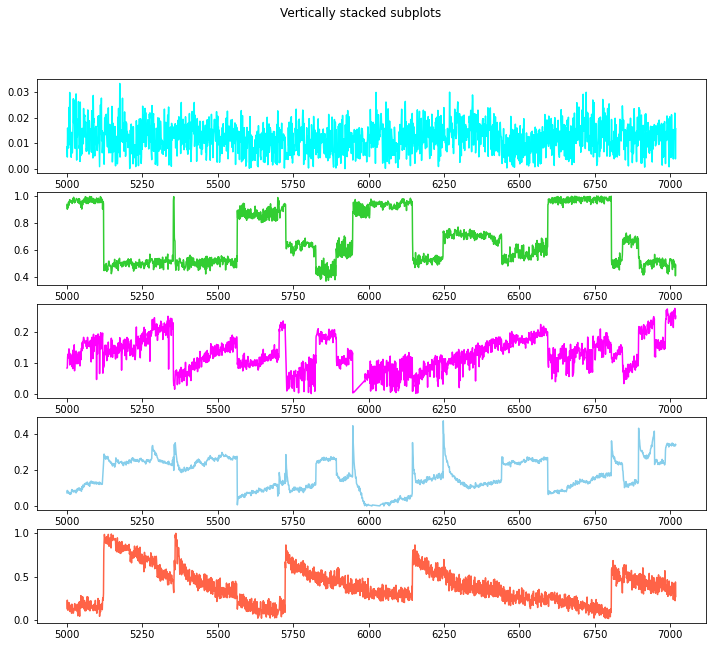

In [44]:
f_rate = prep7.iloc[5000:7020, [6]]
reactant = prep7.iloc[5000:7020, [1]]
dp = prep7.iloc[5000:7020, [7]]
t_cat = prep7.iloc[5000:7020, [17]]
conv_y = prep7.iloc[5000:7020, [23]]


fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 10))
fig.suptitle('Vertically stacked subplots')
axs[0].plot(f_rate, color = 'cyan', label = 'Feed flow rate')
axs[1].plot(reactant, color = 'limegreen', label = 'Reactant composition')
axs[2].plot(dp, color = 'magenta', label = 'Differential Pressure')
axs[3].plot(t_cat, color = 'skyblue', label = "Temperature")
axs[4].plot(conv_y, color = 'tomato', label = 'Conversion')

# MACHINE LEARNING MODEL : RANDOM FORREST REGRESSION

In [45]:
feature_list = list(X_df.columns)
feature_names = X_df.columns

In [46]:
#Run Ramdom Forest Regressor without hyper parameter tuning (default)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, oob_score = True)
regressor.fit(X_train, y_train) # change this

RandomForestRegressor(oob_score=True)

In [47]:
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
#Generate Regressor score and OOB Score of the model
print("\nRegressor Score " + str(regressor.score(X_train, y_train)), "\nOOB Score " + str(regressor.oob_score_))


Regressor Score 0.9980238408025831 
OOB Score 0.9856095932554242


In [49]:
rfr_model_pred = regressor.predict(X_val)
rfr_model_pred

array([0.47301312, 0.54221762, 0.57387783, ..., 0.84760977, 0.84338639,
       0.82941423])

In [50]:
# evaluate predictions for base model
model_metrics(y_val, rfr_model_pred)

Mean Absolute Error: 0.6265787962983687
Mean Squared Error: 1.1746609559578756
Root Mean Squared Error: 1.0838177687959705
Coefficient of Determination: 0.923578778940615
Akaike Information Criterion: 107.402
Bayesian Information Criterion: 118.880


<Figure size 640x480 with 0 Axes>

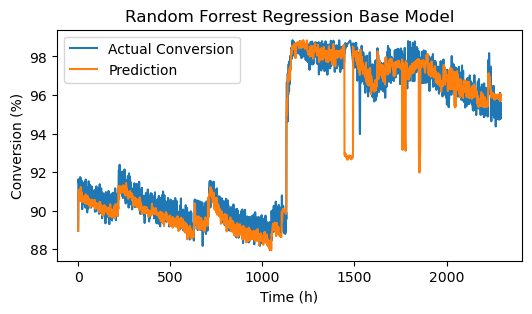

In [52]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(rfr_model_pred), label = "Prediction")
    #plt.grid()
    plt.title('Random Forrest Regression Base Model')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

<Figure size 640x480 with 0 Axes>

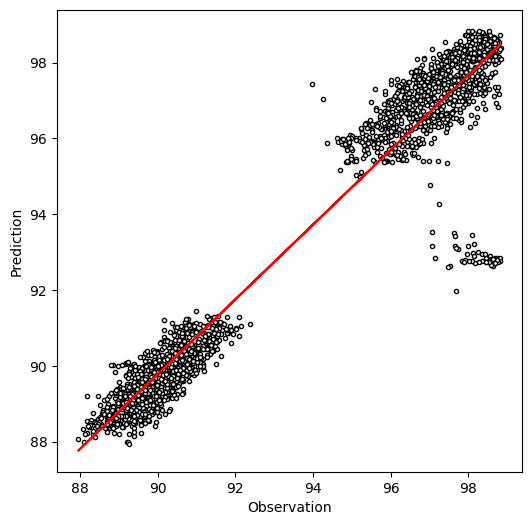

In [54]:
#Plot relationship between observed and predicted value
m_rfr_train, b_rfr_train = np.polyfit(return_conversion_scale(y_val), return_conversion_scale(rfr_model_pred), 1)
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_val), return_conversion_scale(rfr_model_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_val), m_rfr_train*(return_conversion_scale(y_val)) + b_rfr_train, color = 'r')
    #plt.grid()
    #plt.title('Random Forrest Regression Base Model')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()

In [55]:
#Showing feature importance based on random forrest
fi = pd.DataFrame({'feature': feature_list,
                   'importance': regressor.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
2,DP-001,0.608785
11,TI-018,0.110142
15,TI-037,0.108287
5,DT-001,0.036721
1,AI-009,0.027720
3,DP-002,0.023563
14,TI-024,0.018352
6,PI-002,0.015078
9,TI-012,0.011406
8,TI-008,0.009591


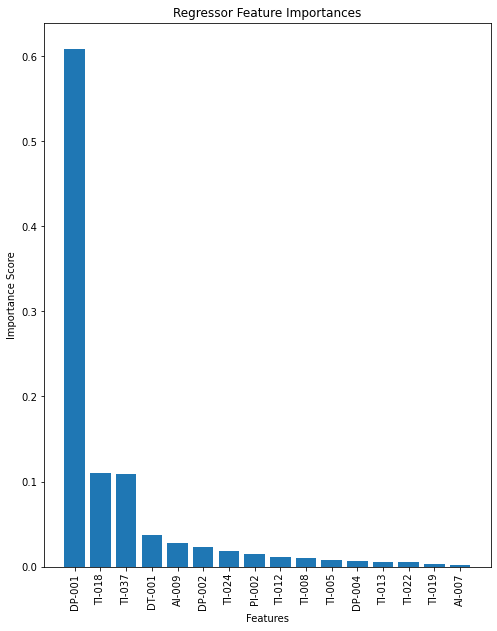

In [56]:
#plt.subplots(figsize=(10,4))
plt.bar(fi['feature'], fi['importance'])
plt.title('Regressor Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation = 90)
plt.show()

In [57]:
#Random Search with Cross Validation
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 39)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [True, False]}


In [58]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 200, scoring='r2', 
                              cv = ts_split, verbose=2, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 45.9min finished


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=RandomForestRegressor(), n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [10, 15, 20, 25, 30, 35,
                                                         40, 45, 50, 55, 60, 65,
                                                         70, 75, 80, 85, 90, 95,
                     

In [59]:
rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [ ]:
#pd.DataFrame(rf_random.cv_results_).to_excel('rfr2.xlsx')

In [60]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=80, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=8, n_estimators=80)

In [65]:
RFR_final = rf_random.best_estimator_
best_pred = best_random.predict(X_val)
best_pred

array([0.47461125, 0.56764387, 0.57156054, ..., 0.8312079 , 0.8223851 ,
       0.81851563])

In [66]:
#Evaluate the Best Random Search Model

model_metrics(y_val, best_pred)

Mean Absolute Error: 0.563444398747892
Mean Squared Error: 0.6229358608681818
Root Mean Squared Error: 0.7892628591718869
Coefficient of Determination: 0.9592868309225453
Akaike Information Criterion: -1348.567
Bayesian Information Criterion: -1337.089


<Figure size 640x480 with 0 Axes>

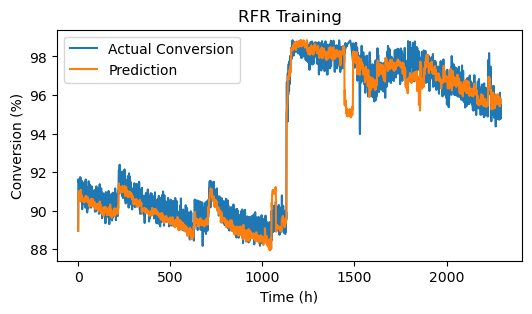

In [67]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(best_pred), label = "Prediction")
    #plt.grid()
    plt.title('RFR Training')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

<Figure size 640x480 with 0 Axes>

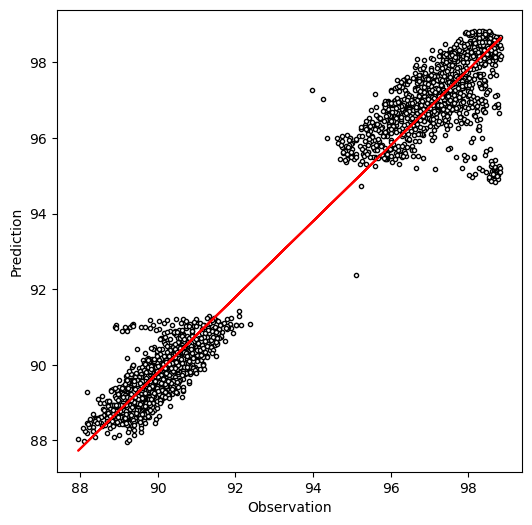

In [68]:
#Plot relationship between observed and predicted value
m_rfr_tr, b_rfr_tr = np.polyfit(return_conversion_scale(y_val), return_conversion_scale(best_pred), 1)
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_val), return_conversion_scale(best_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_val), m_rfr_tr*(return_conversion_scale(y_val)) + b_rfr_tr, color = 'r')
    #plt.grid()
    #plt.title('Random Forrest Regression Base Model')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()

In [69]:
RFR_final = best_random
RFR_predict = RFR_final.predict(X_test)

In [70]:
#measure model performance
model_metrics(y_test, RFR_predict)

Mean Absolute Error: 0.8119517420016814
Mean Squared Error: 1.0831409409077346
Root Mean Squared Error: 1.0407405732975603
Coefficient of Determination: 0.8272546282266128
Akaike Information Criterion: -787.594
Bayesian Information Criterion: -776.001


<Figure size 640x480 with 0 Axes>

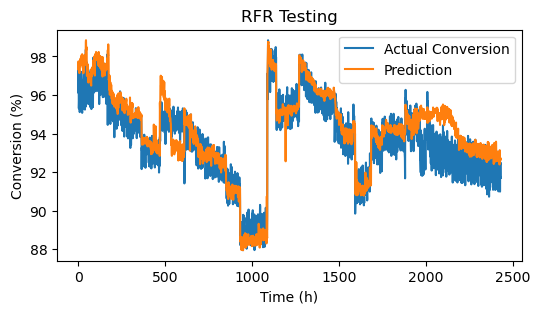

In [71]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_test), label = "Actual Conversion")
    plt.plot(return_conversion_scale(RFR_predict), label = "Prediction")
    #plt.grid()
    plt.title('RFR Testing')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

<Figure size 640x480 with 0 Axes>

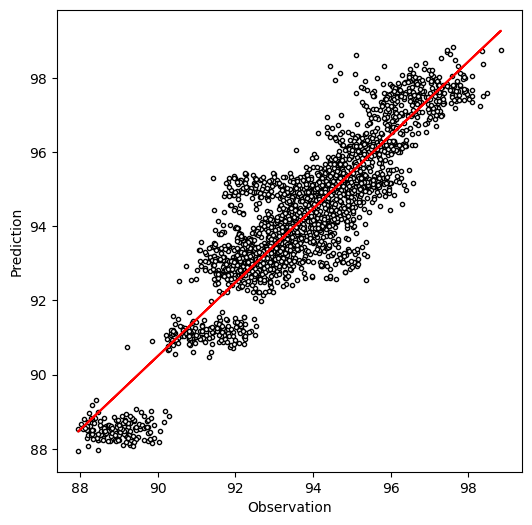

In [79]:
#Plot relationship between observed and predicted value
m_rfr_test, b_rfr_test = np.polyfit(return_conversion_scale(y_test), return_conversion_scale(RFR_predict), 1)
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_test), return_conversion_scale(RFR_predict), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_test), m_rfr_test*(return_conversion_scale(y_test)) + b_rfr_test, color = 'r')
    #plt.grid()
    #plt.title('Random Forrest Regression Base Model')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()

# MACHINE LEARNING MODEL : SUPPORT VECTOR REGRESSION

In [87]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#Fit SVR base model
svr_rbf = SVR()
svr_rbf.fit(X_train, y_train)

SVR()

In [88]:
svr_rbf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [89]:
#Predict SVR base model
svr_pred = svr_rbf.predict(X_val)
svr_pred

array([0.515374  , 0.57835173, 0.60861518, ..., 0.79691973, 0.79603819,
       0.79677832])

In [90]:
#Evaluating SVR performance
model_metrics(y_val, svr_pred)

Mean Absolute Error: 0.6506031191950616
Mean Squared Error: 0.663264386662157
Root Mean Squared Error: 0.8144104534337443
Coefficient of Determination: 0.9430675451877873
Akaike Information Criterion: -1278.111
Bayesian Information Criterion: -1266.634


<Figure size 640x480 with 0 Axes>

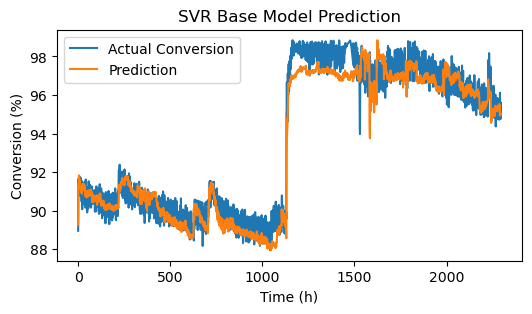

In [91]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(svr_pred), label = "Prediction")
    #plt.grid()
    plt.title('SVR Base Model Prediction')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

<Figure size 640x480 with 0 Axes>

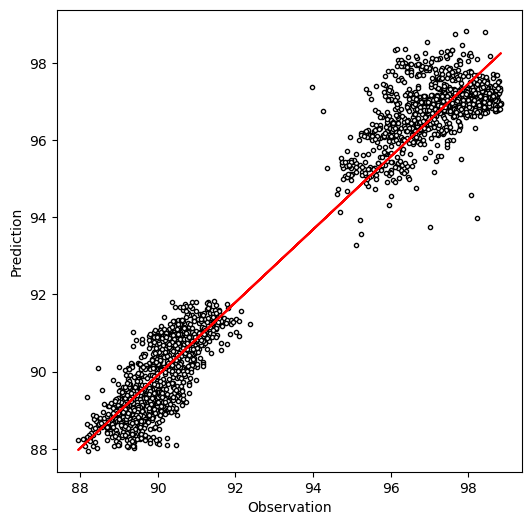

In [92]:
#Plot relationship between observed and predicted value
m_svr_base, b_svr_base = np.polyfit(return_conversion_scale(y_val), return_conversion_scale(svr_pred), 1)
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_val), return_conversion_scale(svr_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_val), m_svr_base*(return_conversion_scale(y_val)) + b_svr_base, color = 'r')
    #plt.grid()
    #plt.title('Random Forrest Regression Base Model')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()

In [139]:
#Set parameter for grid search :
kernel = ['poly', 'rbf']
gamma = ['scale', 'auto']
degree = [1, 2, 3, 4]
C = [0.01, 0.1, 1, 10] 
epsilon = [0.01, 0.1, 1]

# Create the random grid
param_grid = {'C': C,
              'kernel': kernel,
              'degree': degree,
              'gamma': gamma,
               'epsilon': epsilon}

print(param_grid)

{'C': [0.01, 0.1, 1, 10], 'kernel': ['poly', 'rbf'], 'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'], 'epsilon': [0.01, 0.1, 1]}


In [140]:
from sklearn.model_selection import RandomizedSearchCV

svr_random = RandomizedSearchCV(estimator=SVR(), param_distributions=param_grid,
                              n_iter = 100, verbose = 3, n_jobs=-1, cv = ts_split,
                                scoring = 'r2')
svr_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.1min finished


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'degree': [1, 2, 3, 4],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly', 'rbf']},
                   scoring='r2', verbose=3)

In [141]:
pd.DataFrame(svr_random.cv_results_).to_excel('svr_random_grid.xlsx')

In [142]:
svr_random.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.1, 'degree': 3, 'C': 0.1}

In [118]:
#Use the random grid to search for best hyperparameters

# Create the grid search model and fit to the training data
svr_grid = GridSearchCV(SVR(), param_grid=param_grid, verbose = 3, n_jobs=-1, cv = ts_split,
                                scoring = 'neg_mean_squared_error')
svr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.0min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1],
                         'gamma': ['scale', 'auto']},
             scoring='neg_mean_squared_error', verbose=3)

In [119]:
svr_grid.best_params_

{'C': 0.1, 'epsilon': 0.1, 'gamma': 'auto'}

In [120]:
#SGF = pd.DataFrame(svr_grid_first.cv_results_)
#SGF.to_excel('svr_grid_result2.xlsx')

In [143]:
#Predict hyper parameter tuned SVR
best_svr_pred = svr_random.predict(X_val)

In [144]:
#Evaluating hyper parameter tuned SVR performance

model_metrics(y_val, best_svr_pred)

Mean Absolute Error: 1.1097121536574202
Mean Squared Error: 1.8088089154108213
Root Mean Squared Error: 1.344919668757514
Coefficient of Determination: 0.8715756070891569
Akaike Information Criterion: 509.467
Bayesian Information Criterion: 520.944


<Figure size 640x480 with 0 Axes>

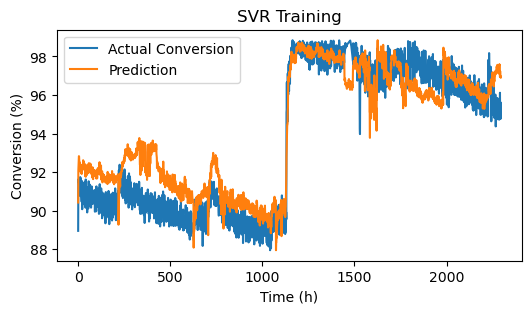

In [145]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(best_svr_pred), label = "Prediction")
    plt.title('SVR Training')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

<Figure size 640x480 with 0 Axes>

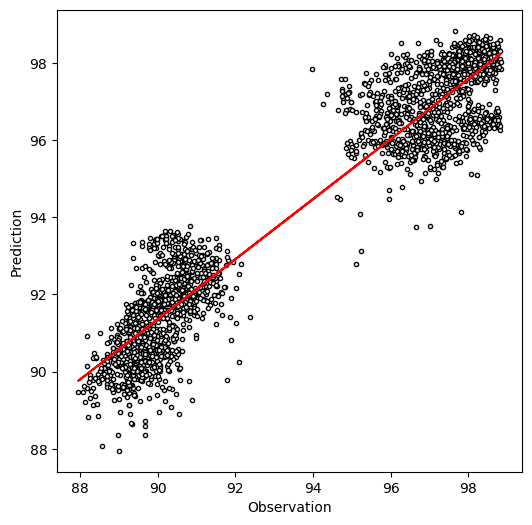

In [146]:
#Plot relationship between observed and predicted value
m_svr_train, b_svr_train = np.polyfit(return_conversion_scale(y_val), return_conversion_scale(best_svr_pred), 1)

with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_val), return_conversion_scale(best_svr_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_val), m_svr_train*(return_conversion_scale(y_val)) + b_svr_train, color = 'r')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()

In [147]:
#Testing the final model 
svr_predict = svr_grid.predict(X_test)

In [148]:
#Evaluating final model SVR performance

model_metrics(y_test, svr_predict)

Mean Absolute Error: 1.3655928216378137
Mean Squared Error: 2.996848526136219
Root Mean Squared Error: 1.7311408163798285
Coefficient of Determination: 0.3872791459744711
Akaike Information Criterion: 2139.566
Bayesian Information Criterion: 2151.159


<Figure size 640x480 with 0 Axes>

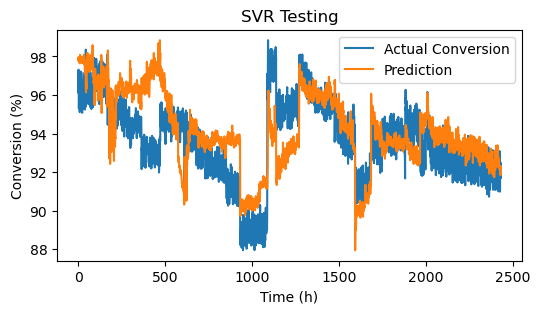

In [149]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_test), label = "Actual Conversion")
    plt.plot(return_conversion_scale(svr_predict), label = "Prediction")
    plt.title('SVR Testing')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

<Figure size 640x480 with 0 Axes>

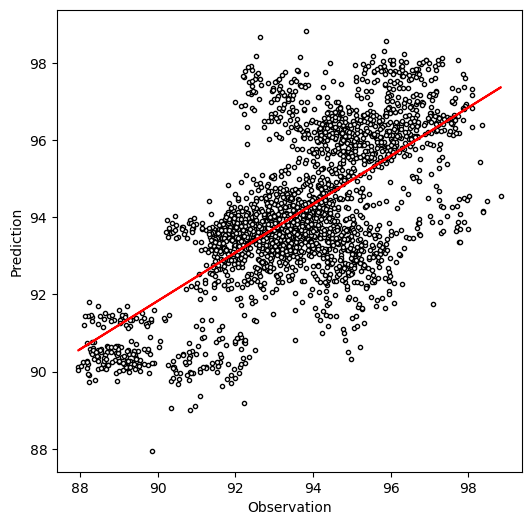

In [150]:
#Plot relationship between observed and predicted value
m_svr_test, b_svr_test = np.polyfit(return_conversion_scale(y_test), return_conversion_scale(svr_predict), 1)
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_test), return_conversion_scale(svr_predict), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_test), m_svr_test*(return_conversion_scale(y_test)) + b_svr_test, color = 'r')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()

In [131]:
new_predict = SVR().fit(X_train, y_train).predict(X_test)

In [133]:
model_metrics(y_test, new_predict)

Mean Absolute Error: 1.0179726029235945
Mean Squared Error: 1.5773386333560107
Root Mean Squared Error: 1.255921428018493
Coefficient of Determination: 0.7475925074056085
Akaike Information Criterion: 1.765
Bayesian Information Criterion: 13.358


# RNN - LSTM

In [45]:
#Import RNN-LSTM library
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import GridSearchCV

In [46]:
#Reshape data into 3D input
X_train_adj = X_train.reshape((X_train.shape[0], 1, X_train.shape[1])) #reshape (adjust) train shape to 3 dimensional
X_val_adj  = X_val.reshape((X_val.shape[0], 1, X_val.shape[1])) #reshape (adjust) test shape to 3 dimensional
print(X_train_adj.shape, X_val_adj.shape, y_train.shape, y_val.shape )

(11485, 1, 16) (2296, 1, 16) (11485,) (2296,)


In [47]:
#Build the model
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
model_lstm.add(tf.keras.layers.LSTM(units=30))
model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.Dense(units=1))
model_lstm.compile(loss = 'mse', optimizer = 'adam')
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 75)             27600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                12720     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________


In [48]:
#Fit the model
history_lstm = model_lstm.fit(X_train_adj, y_train, epochs = 20, batch_size=64, validation_data = (X_val_adj, y_val), shuffle=False)

Epoch 1/20
180/180 [==============================] - 3s 17ms/step - loss: 0.0494 - val_loss: 0.0444
Epoch 2/20
180/180 [==============================] - 1s 6ms/step - loss: 0.0385 - val_loss: 0.0378
Epoch 3/20
180/180 [==============================] - 1s 6ms/step - loss: 0.0358 - val_loss: 0.0325
Epoch 4/20
180/180 [==============================] - 1s 6ms/step - loss: 0.0330 - val_loss: 0.0271
Epoch 5/20
180/180 [==============================] - 1s 6ms/step - loss: 0.0293 - val_loss: 0.0213
Epoch 6/20
180/180 [==============================] - 1s 6ms/step - loss: 0.0257 - val_loss: 0.0158
Epoch 7/20
180/180 [==============================] - 1s 6ms/step - loss: 0.0221 - val_loss: 0.0152
Epoch 8/20
180/180 [==============================] - 1s 6ms/step - loss: 0.0200 - val_loss: 0.0142
Epoch 9/20
180/180 [==============================] - 1s 6ms/step - loss: 0.0186 - val_loss: 0.0135
Epoch 10/20
180/180 [==============================] - 1s 6ms/step - loss: 0.0181 - val_loss: 0.014

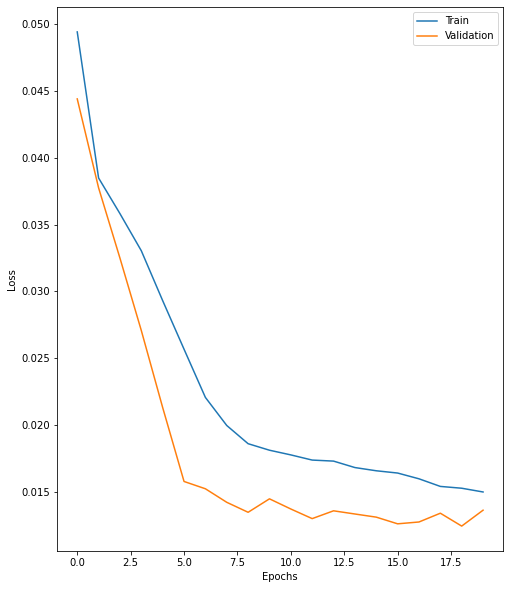

In [49]:
# plot history
plt.plot(history_lstm.history['loss'], label='train')
plt.plot(history_lstm.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [50]:
lstm_first_pred = model_lstm(X_val_adj)

In [51]:
#Convert Tensor value to array
lstm_first_pred_a = lstm_first_pred.numpy()

In [52]:
model_metrics(y_val, lstm_first_pred_a)

Mean Absolute Error: 1.1553587551087565
Mean Squared Error: 2.5991182389833507
Root Mean Squared Error: 1.6121781039895533
Coefficient of Determination: 0.6808624212448945
Akaike Information Criterion: 1681.562
Bayesian Information Criterion: 1693.040


<Figure size 640x480 with 0 Axes>

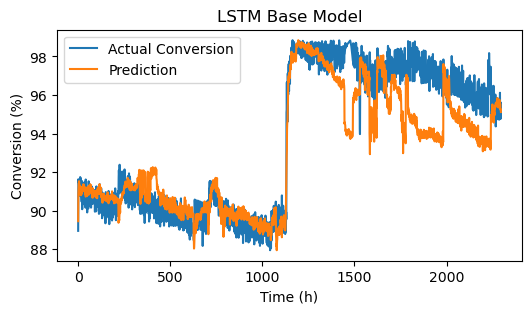

In [53]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(lstm_first_pred), label = "Prediction")
    plt.title('LSTM Base Model')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

<Figure size 640x480 with 0 Axes>

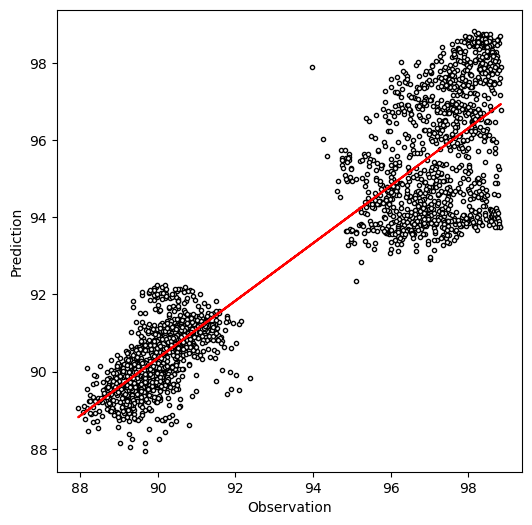

In [54]:
#Plot relationship between observed and predicted value
m_lstm_base, b_lstm_base = np.polyfit(return_conversion_scale(y_val), return_conversion_scale(lstm_first_pred), 1)

with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_val), return_conversion_scale(lstm_first_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_val), m_lstm_base*(return_conversion_scale(y_val)) + b_lstm_base, color = 'r')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()

In [55]:
#LSTM hyperparameter tuning 1st step : batch_size and epochs
#Create LSTM function model
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=1))
    
    model.compile(loss = 'mse', optimizer = 'adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    model.summary()
    return model

In [56]:
model_tuning = KerasRegressor(build_fn=create_model, verbose=0)

In [57]:
# define the grid search parameters
batch_size = [8, 16, 32, 64, 128, 256, 512]
epochs = [10, 15, 20, 50] #trial without 100

param_grid = dict(batch_size=batch_size, epochs=epochs)
lstm_grid = GridSearchCV(estimator=model_tuning, param_grid=param_grid, n_jobs=-1, cv=ts_split)
grid_result = lstm_grid.fit(X_train_adj, y_train)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 75)             27600     
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                12720     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________


In [58]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.035489 using {'batch_size': 8, 'epochs': 10}
-0.035489 (0.020966) with: {'batch_size': 8, 'epochs': 10}
-0.039859 (0.019013) with: {'batch_size': 8, 'epochs': 15}
-0.044627 (0.020565) with: {'batch_size': 8, 'epochs': 20}
-0.097752 (0.113113) with: {'batch_size': 8, 'epochs': 50}
-0.038089 (0.019957) with: {'batch_size': 16, 'epochs': 10}
-0.036918 (0.017390) with: {'batch_size': 16, 'epochs': 15}
-0.039131 (0.019720) with: {'batch_size': 16, 'epochs': 20}
-0.064766 (0.046400) with: {'batch_size': 16, 'epochs': 50}
-0.040349 (0.036316) with: {'batch_size': 32, 'epochs': 10}
-0.036318 (0.025310) with: {'batch_size': 32, 'epochs': 15}
-0.039280 (0.028307) with: {'batch_size': 32, 'epochs': 20}
-0.050039 (0.030820) with: {'batch_size': 32, 'epochs': 50}
-0.036089 (0.026483) with: {'batch_size': 64, 'epochs': 10}
-0.039336 (0.030580) with: {'batch_size': 64, 'epochs': 15}
-0.038494 (0.030921) with: {'batch_size': 64, 'epochs': 20}
-0.045731 (0.026729) with: {'batch_size': 64, 'epo

In [59]:
#pd.DataFrame(grid_result.cv_results_).head()

In [60]:
lstm_grid.best_params_

{'batch_size': 8, 'epochs': 10}

In [61]:
#LSTM hyperparameter tuning 2nd step : dropout rate
# fit a model and plot learning curve
def trial_dropout(dropout):
    # define model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units=1))
    
    # compile model
    opt = tf.keras.optimizers.Adam(lr=0.01)
    model.compile(loss = 'mse', optimizer = opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.summary() 
    
    # fit model
    model_history = model.fit(X_train_adj, y_train, epochs =lstm_grid.best_params_['epochs'], 
                                  batch_size=lstm_grid.best_params_['batch_size'], validation_data = (X_val_adj, y_val), 
                                  verbose=2)
    return(model)

In [65]:
# run a repeated experiment
def experiment_dropout(n_repeats, dropout):
    # run experiment
    error_scores = list()
    for r in range(n_repeats):
        # fit the model
        # forecast test dataset
        output = trial_dropout(dropout).predict(X_val_adj)
        # report performance
        mse = metrics.mean_squared_error(y_val, output)
        print('%d) Test MSE: %.3f' % (r+1, mse))
        error_scores.append(mse)
    return error_scores

In [66]:
def run_dropout():
    # load dataset
    dropouts = [0.0, 0.1, 0.2, 0.3, 0.4]
    n_repeats = 10
    # run the experiment
    results_dropout = pd.DataFrame()
    for dropout in dropouts:
        results_dropout[str(dropout)] = experiment_dropout(n_repeats, dropout)
    # summarize results
    print(results_dropout.describe())
    # save boxplot
    results_dropout.to_excel('lstm_dropout.xlsx')
    results_dropout.boxplot()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Dropout', fontsize=16)
    plt.ylabel('Mean Squarred Error', fontsize=16)
    plt.savefig('experiment_dropout_input.png')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 75)             27600     
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                12720     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1436/1436 - 6s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 2/10
1436/1436 - 5s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoc

Epoch 9/10
1436/1436 - 5s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 10/10
1436/1436 - 5s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
4) Test MSE: 0.002
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_13 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
__________________________________________________

Epoch 7/10
1436/1436 - 6s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 8/10
1436/1436 - 6s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 9/10
1436/1436 - 6s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 10/10
1436/1436 - 6s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
8) Test MSE: 0.001
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 1, 75)             27600     
_________________________________________________________________
lstm_21 (LSTM)               (None, 30)                12720     
_________________________________________________________________
dropout_10 (Dropout)         (None, 30)                0         
_______

Epoch 5/10
1436/1436 - 6s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 6/10
1436/1436 - 6s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 7/10
1436/1436 - 6s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 8/10
1436/1436 - 6s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9/10
1436/1436 - 6s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 10/10
1436/1436 - 6s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
2) Test MSE: 0.002
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 1, 75)             27600     
___________________________

Epoch 3/10
1436/1436 - 6s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4/10
1436/1436 - 6s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 5/10
1436/1436 - 6s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6/10
1436/1436 - 6s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 7/10
1436/1436 - 6s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 8/10
1436/1436 - 6s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 9/10
1436/1436 - 6s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 10/10
1436/1436 - 6s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
6) Test MSE: 0.001
Mode

1436/1436 - 6s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 2/10
1436/1436 - 6s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 3/10
1436/1436 - 6s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 4/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 5/10
1436/1436 - 6s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 6/10
1436/1436 - 6s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 7/10
1436/1436 - 6s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 8/10
1436/1436 - 6s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 6s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 2/10
1436/1436 - 6s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 3/10
1436/1436 - 6s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 4/10
1436/1436 - 6s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 5/10
1436/1436 - 6s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 6/10
1436/1436 - 6s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 7/10
1436/1436 - 6s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 8/10
1436/1436 - 6s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 2/10
1436/1436 - 6s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 3/10
1436/1436 - 6s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 4/10
1436/1436 - 6s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 5/10
1436/1436 - 6s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 6/10
1436/1436 - 6s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 7/10
1436/1436 - 6s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8/10
1436/1436 - 6s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 2/10
1436/1436 - 6s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 3/10
1436/1436 - 6s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/10
1436/1436 - 6s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 5/10
1436/1436 - 6s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6/10
1436/1436 - 6s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 7/10
1436/1436 - 6s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 8/10
1436/1436 - 6s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 2/10
1436/1436 - 6s - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 3/10
1436/1436 - 6s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4/10
1436/1436 - 6s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5/10
1436/1436 - 6s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 6/10
1436/1436 - 6s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 7/10
1436/1436 - 6s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 8/10
1436/1436 - 6s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 2/10
1436/1436 - 6s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 3/10
1436/1436 - 6s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 4/10
1436/1436 - 6s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 5/10
1436/1436 - 6s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 6/10
1436/1436 - 6s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7/10
1436/1436 - 6s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8/10
1436/1436 - 6s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 2/10
1436/1436 - 6s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 3/10
1436/1436 - 6s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 4/10
1436/1436 - 6s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 5/10
1436/1436 - 6s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 6/10
1436/1436 - 6s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 7/10
1436/1436 - 6s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 8/10
1436/1436 - 6s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 2/10
1436/1436 - 6s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 3/10
1436/1436 - 6s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4/10
1436/1436 - 6s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5/10
1436/1436 - 6s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6/10
1436/1436 - 6s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 7/10
1436/1436 - 6s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 8/10
1436/1436 - 6s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 9/10
1436/1436 - 6s - loss: 0

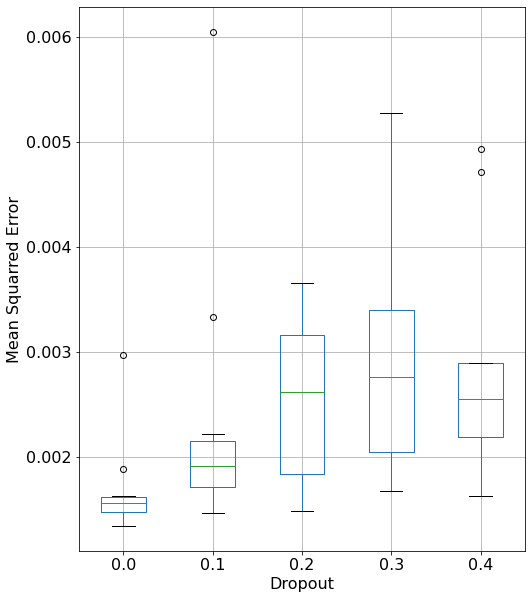

In [67]:
run_dropout()

In [68]:
#LSTM hyperparameter tuning 2nd step : lerning rate
# fit a model and plot learning curve
def trial_lrate(lrate):
    # define model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(0))
    model.add(tf.keras.layers.Dense(units=1))
    
    # compile model
    opt = tf.keras.optimizers.Adam(lr=lrate)
    model.compile(loss = 'mse', optimizer = opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.summary() 
    
    # fit model
    model_history = model.fit(X_train_adj, y_train, epochs =lstm_grid.best_params_['epochs'], 
                                  batch_size=lstm_grid.best_params_['batch_size'], validation_data = (X_val_adj, y_val), 
                                  verbose=2)
    return(model)

In [69]:
# run a repeated experiment
def experiment_lrate(n_repeats, lrate):
    # run experiment
    error_scores = list()
    for r in range(n_repeats):
        # fit the model
        # forecast test dataset
        output = trial_lrate(lrate).predict(X_val_adj)
        # report performance
        mse = metrics.mean_squared_error(y_val, output)
        print('%d) Test RMSE: %.3f' % (r+1, mse))
        error_scores.append(mse)
    return error_scores

In [70]:
def run_lrate():
    # load dataset
    learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5]
    n_repeats = 10
    # run the experiment
    results = pd.DataFrame()
    for lrate in learning_rates:
        results[str(lrate)] = experiment_lrate(n_repeats, lrate)
    # summarize results
    print(results.describe())
    # save boxplot
    results.to_excel('lstm_lrate.xlsx')
    results.boxplot()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('Learning rate', fontsize=16)
    plt.ylabel('Mean Squarred Error', fontsize=16)
    plt.savefig('experiment_dropout_input.png')

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_104 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_105 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_52 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1436/1436 - 7s - loss: 0.3575 - mean_squared_error: 0.3575 - val_loss: 0.2462 - val_mean_squared_error: 0.2462
Epoch 2/10
1436/1436 - 6s - loss: 0.2956 - mean_squared_error: 0.2956 - val_loss: 0.7135 - val_mean_squared_error: 0.7135
Epo

Epoch 9/10
1436/1436 - 6s - loss: 0.2766 - mean_squared_error: 0.2766 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 10/10
1436/1436 - 6s - loss: 0.2788 - mean_squared_error: 0.2788 - val_loss: 0.6809 - val_mean_squared_error: 0.6809
4) Test RMSE: 0.681
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_112 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_113 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_56 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
________________________________________________

Epoch 7/10
1436/1436 - 6s - loss: 0.2730 - mean_squared_error: 0.2730 - val_loss: 0.3427 - val_mean_squared_error: 0.3427
Epoch 8/10
1436/1436 - 6s - loss: 0.2638 - mean_squared_error: 0.2638 - val_loss: 0.0668 - val_mean_squared_error: 0.0668
Epoch 9/10
1436/1436 - 6s - loss: 0.2703 - mean_squared_error: 0.2703 - val_loss: 0.2090 - val_mean_squared_error: 0.2090
Epoch 10/10
1436/1436 - 6s - loss: 0.2730 - mean_squared_error: 0.2730 - val_loss: 0.2898 - val_mean_squared_error: 0.2898
8) Test RMSE: 0.290
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_120 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_121 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_60 (Dropout)         (None, 30)                0         
______

Epoch 5/10
1436/1436 - 6s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 6/10
1436/1436 - 6s - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 7/10
1436/1436 - 6s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 8/10
1436/1436 - 6s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 9/10
1436/1436 - 6s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 10/10
1436/1436 - 6s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
2) Test RMSE: 0.008
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_128 (LSTM)              (None, 1, 75)             27600     
__________________________

Epoch 3/10
1436/1436 - 7s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 4/10
1436/1436 - 7s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/10
1436/1436 - 6s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 6/10
1436/1436 - 6s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 7/10
1436/1436 - 6s - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 8/10
1436/1436 - 6s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 9/10
1436/1436 - 6s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 10/10
1436/1436 - 6s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
6) Test RMSE: 0.003
Mod

1436/1436 - 7s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 2/10
1436/1436 - 6s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 3/10
1436/1436 - 6s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 4/10
1436/1436 - 6s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5/10
1436/1436 - 6s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 6/10
1436/1436 - 6s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 7/10
1436/1436 - 6s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 8/10
1436/1436 - 6s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 2/10
1436/1436 - 6s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 3/10
1436/1436 - 6s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 4/10
1436/1436 - 6s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5/10
1436/1436 - 6s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6/10
1436/1436 - 6s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 7/10
1436/1436 - 6s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 8/10
1436/1436 - 6s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2/10
1436/1436 - 6s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 3/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 4/10
1436/1436 - 6s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 5/10
1436/1436 - 6s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 6/10
1436/1436 - 6s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 7/10
1436/1436 - 6s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 8/10
1436/1436 - 6s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 2/10
1436/1436 - 6s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 3/10
1436/1436 - 6s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 4/10
1436/1436 - 6s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5/10
1436/1436 - 6s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7/10
1436/1436 - 6s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 8/10
1436/1436 - 6s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 2/10
1436/1436 - 6s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 3/10
1436/1436 - 6s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 4/10
1436/1436 - 6s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5/10
1436/1436 - 6s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 6/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7/10
1436/1436 - 6s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 8/10
1436/1436 - 6s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 2/10
1436/1436 - 6s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3/10
1436/1436 - 6s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/10
1436/1436 - 6s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 5/10
1436/1436 - 6s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 6/10
1436/1436 - 6s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7/10
1436/1436 - 6s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 8/10
1436/1436 - 6s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0510 - mean_squared_error: 0.0510 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 2/10
1436/1436 - 6s - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 3/10
1436/1436 - 6s - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 4/10
1436/1436 - 6s - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 5/10
1436/1436 - 6s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 6/10
1436/1436 - 6s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 7/10
1436/1436 - 6s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 8/10
1436/1436 - 6s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 2/10
1436/1436 - 6s - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 3/10
1436/1436 - 6s - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 4/10
1436/1436 - 6s - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 5/10
1436/1436 - 6s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 6/10
1436/1436 - 6s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 7/10
1436/1436 - 6s - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 8/10
1436/1436 - 6s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.1854 - mean_squared_error: 0.1854 - val_loss: 0.2987 - val_mean_squared_error: 0.2987
Epoch 2/10
1436/1436 - 6s - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.0952 - val_mean_squared_error: 0.0952
Epoch 3/10
1436/1436 - 6s - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0648 - val_mean_squared_error: 0.0648
Epoch 4/10
1436/1436 - 6s - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0545 - val_mean_squared_error: 0.0545
Epoch 5/10
1436/1436 - 6s - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 6/10
1436/1436 - 6s - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 7/10
1436/1436 - 6s - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 8/10
1436/1436 - 6s - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.1627 - mean_squared_error: 0.1627 - val_loss: 0.2403 - val_mean_squared_error: 0.2403
Epoch 2/10
1436/1436 - 6s - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.0777 - val_mean_squared_error: 0.0777
Epoch 3/10
1436/1436 - 6s - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.0590 - val_mean_squared_error: 0.0590
Epoch 4/10
1436/1436 - 6s - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 5/10
1436/1436 - 6s - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 6/10
1436/1436 - 6s - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 7/10
1436/1436 - 6s - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 8/10
1436/1436 - 6s - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 9/10
1436/1436 - 6s - loss: 0

1436/1436 - 7s - loss: 0.1792 - mean_squared_error: 0.1792 - val_loss: 0.2827 - val_mean_squared_error: 0.2827
Epoch 2/10
1436/1436 - 6s - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.0825 - val_mean_squared_error: 0.0825
Epoch 3/10
1436/1436 - 6s - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0581 - val_mean_squared_error: 0.0581
Epoch 4/10
1436/1436 - 6s - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 5/10
1436/1436 - 6s - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 6/10
1436/1436 - 6s - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 7/10
1436/1436 - 6s - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 8/10
1436/1436 - 6s - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 9/10
1436/1436 - 6s - loss: 0

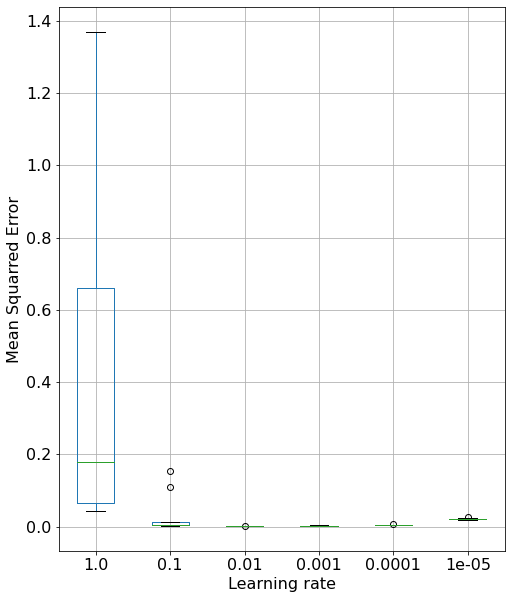

In [71]:
 # entry point
run_lrate()

In [72]:
#Define final LSTM model
def final_model():
    # define model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(0))
    model.add(tf.keras.layers.Dense(units=1))
    
    # compile model
    opt = tf.keras.optimizers.Adam(lr=0.01)
    model.compile(loss = 'mse', optimizer = opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.summary() 
    
    # fit model
    history = model.fit(X_train_adj, y_train, epochs =lstm_grid.best_params_['epochs'], 
                                  batch_size=lstm_grid.best_params_['batch_size'], validation_data = (X_val_adj, y_val), 
                                  verbose=0)
    
    return(model)

In [77]:
#predict taeget for validation
final_pred = final_model().predict(X_val_adj)
model_metrics(y_val, final_pred)

Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_228 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_229 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_114 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.6125809556944259
Mean Squared Error: 0.6046284840560148
Root Mean Squared Error: 0.7775786031366956
Coefficient of Determination: 0.9623086932328788
Akaike Information Criterion: -1689.521
Bayesian Information Criterion: -1

<Figure size 640x480 with 0 Axes>

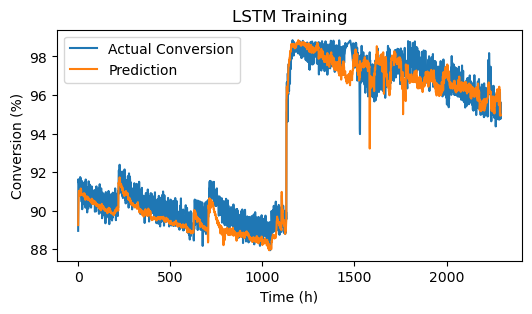

In [78]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(final_pred), label = "Prediction") 
    plt.title('LSTM Training')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

<Figure size 640x480 with 0 Axes>

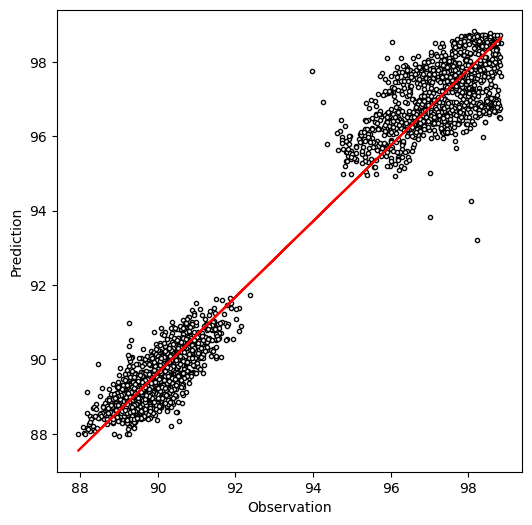

In [79]:
#Plot relationship between observed and predicted value
m_lstm_train, b_lstm_train = np.polyfit(return_conversion_scale(y_val), return_conversion_scale(final_pred), 1)

with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_val), return_conversion_scale(final_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_val), m_lstm_train*(return_conversion_scale(y_val)) + b_lstm_train, color = 'r')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()

In [83]:
#Now predict with test data
#reshape testing data into 3 dimension
X_test_adj = X_test.reshape((X_test.shape[0], 1, X_test.shape[1])) 

#Predict test data
test_pred = final_model().predict(X_test_adj)

#Measure performance metrics
model_metrics(y_test, test_pred)

Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_232 (LSTM)              (None, 1, 75)             27600     
_________________________________________________________________
lstm_233 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_116 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 31        
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.7628719434600167
Mean Squared Error: 0.9367826207957733
Root Mean Squared Error: 0.9678753126285293
Coefficient of Determination: 0.8419875217290987
Akaike Information Criterion: -1131.481
Bayesian Information Criterion: -1

<Figure size 640x480 with 0 Axes>

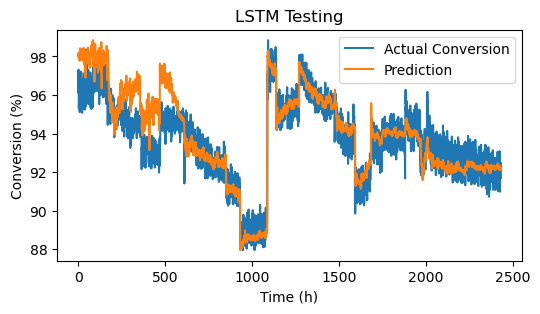

In [81]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,3))
    plt.plot(return_conversion_scale(y_test), label = "Actual Conversion")
    plt.plot(return_conversion_scale(test_pred), label = "Prediction")
    plt.title('LSTM Testing')
    plt.xlabel('Time (h)')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

<Figure size 640x480 with 0 Axes>

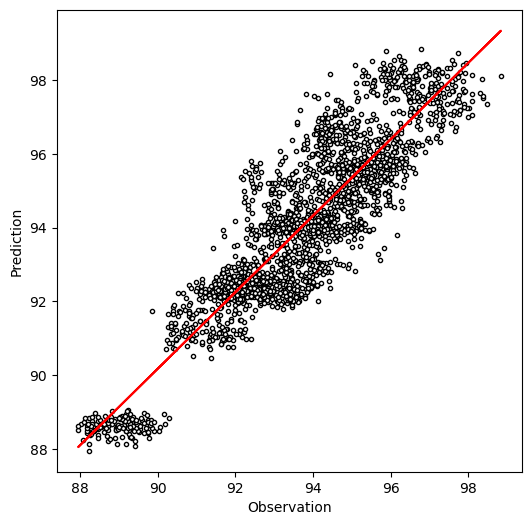

In [82]:
#Plot relationship between observed and predicted value
m_lstm_test, b_lstm_test = np.polyfit(return_conversion_scale(y_test), return_conversion_scale(test_pred), 1)

with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(6,6))
    plt.plot(return_conversion_scale(y_test), return_conversion_scale(test_pred), 'o', 
             markeredgecolor='k', markersize=3, markerfacecolor='w')
    plt.plot(return_conversion_scale(y_test), m_lstm_test*(return_conversion_scale(y_test)) + b_lstm_test, color = 'r')
    plt.xlabel('Observation')
    plt.ylabel('Prediction')
    plt.show()